In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib
matplotlib.use('qt4agg')  # Can also use 'tkagg' or 'webagg'

import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## DATA: direct load from the statsmodels library
http://statsmodels.sourceforge.net/devel/datasets/generated/macrodata.html

# I am interested in you understanding the concepts of stationarity:
## A time series is stationary if its MEAN and its VARIANCE are constant *globally*
## i.e. there can be local variations, but the mean over a reasonably large portion of the time series (several datapoints) will not change at large distances in the time series

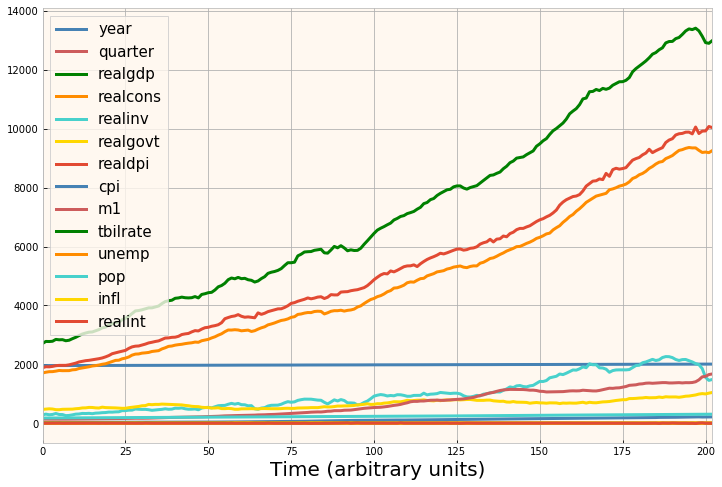

In [2]:
data = sm.datasets.macrodata.load_pandas().data


data.plot(figsize=(12,8))
pl.xlabel("Time (arbitrary units)", fontsize=20)
pl.legend(fontsize=15)
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data, figsize=(25,25));

# NON stationary time series
Real Gross Domestic Product (real GDP) is a macroeconomic measure of the value of economic output adjusted for price changes (i.e., inflation or deflation). This adjustment transforms the money-value measure, nominal GDP, into an index for quantity of total output.

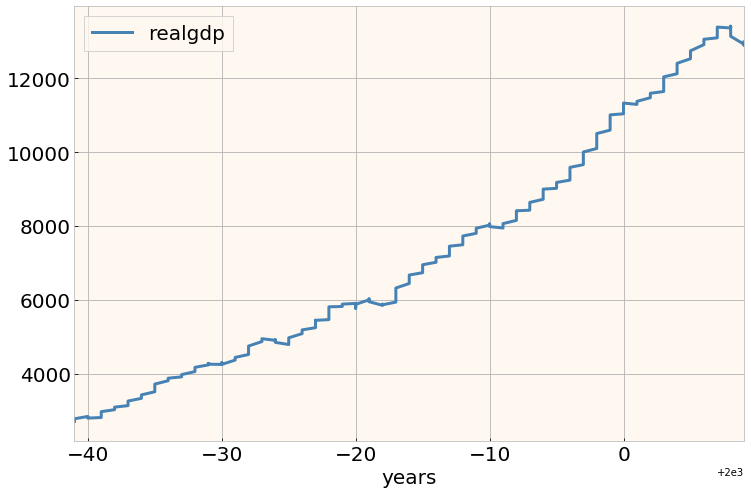

In [3]:
ax = data.plot('year','realgdp', figsize=(12,8), fontsize=20);
ax.set_xlabel("years", fontsize=20)
ax.legend(fontsize=20)

# use a ROLLING MEAN to visually assess stationarity

gdp
 0    2710.349
1    2778.801
2    2775.488
3    2785.204
4    2847.699
Name: realgdp, dtype: float64 
 198    13324.600
199    13141.920
200    12925.410
201    12901.504
202    12990.341
Name: realgdp, dtype: float64
rolling mean of gdp
 9     2806.4838
10    2827.2908
11    2847.1937
12    2872.7690
13    2900.7195
Name: realgdp, dtype: float64 
 198    13211.2024
199    13229.1482
200    13225.0976
201    13209.1801
202    13198.2241
Name: realgdp, dtype: float64


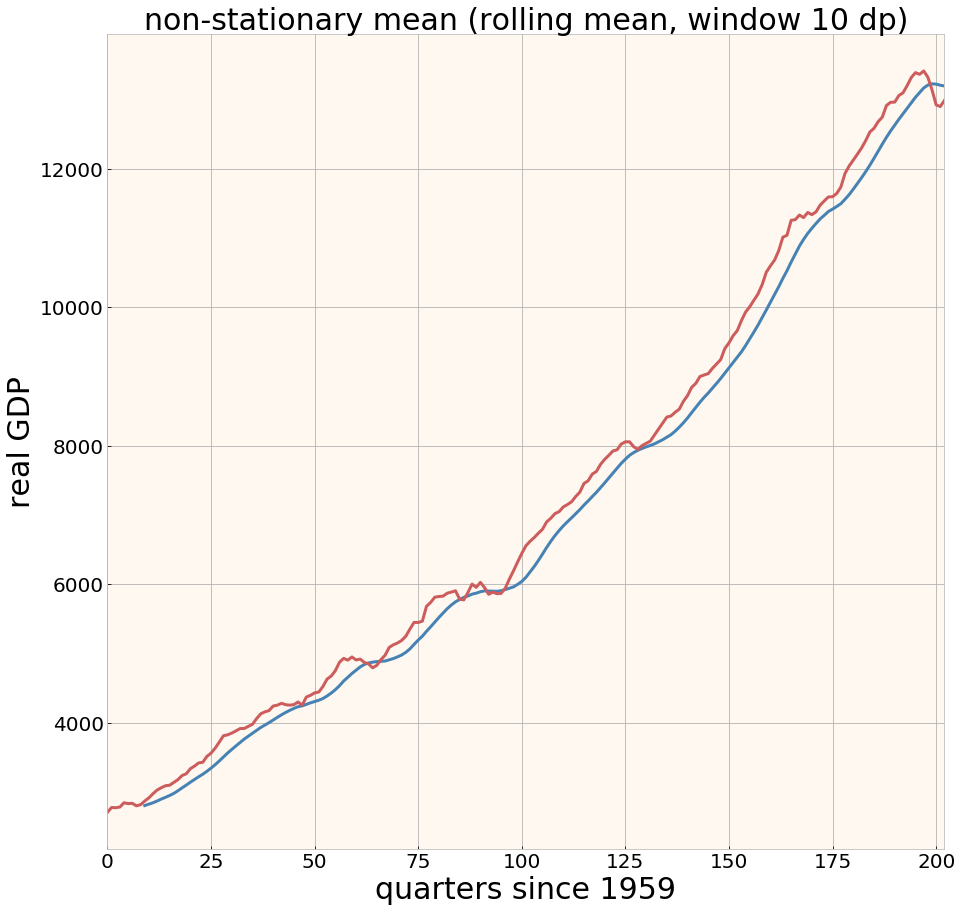

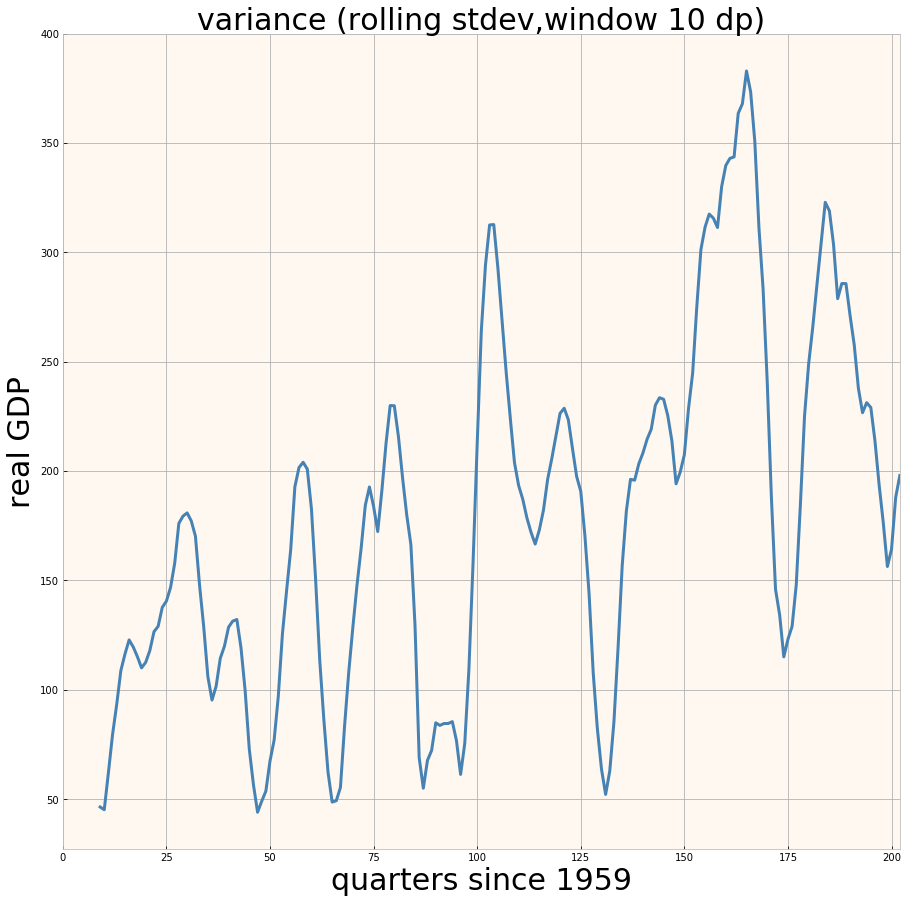

In [4]:
fig = pl.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax = pd.rolling_mean(data['realgdp'], 10).plot(fontsize=20)
ax.set_title("non-stationary mean (rolling mean, window 10 dp)", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)
ax.plot(data["realgdp"], label="original")
pl.figure()
ax = pd.rolling_std(data['realgdp'], 10).plot(figsize=(15,15))
ax.set_title("variance (rolling stdev,window 10 dp)", fontsize=30)
pl.xlabel("quarters since 1959", fontsize=30)
pl.ylabel("real GDP", fontsize=30)

print ("gdp\n", 
       data['realgdp'].dropna().head(), "\n", 
       data['realgdp'].dropna().tail())

print ("rolling mean of gdp\n", 
       pd.rolling_mean(data['realgdp'], 10).dropna().head(), "\n", 
       pd.rolling_mean(data['realgdp'], 10).dropna().tail())



# differencing the time series to remove the long term behavior

Text(0,0.5,'DIFFERENCED REAL GDP')

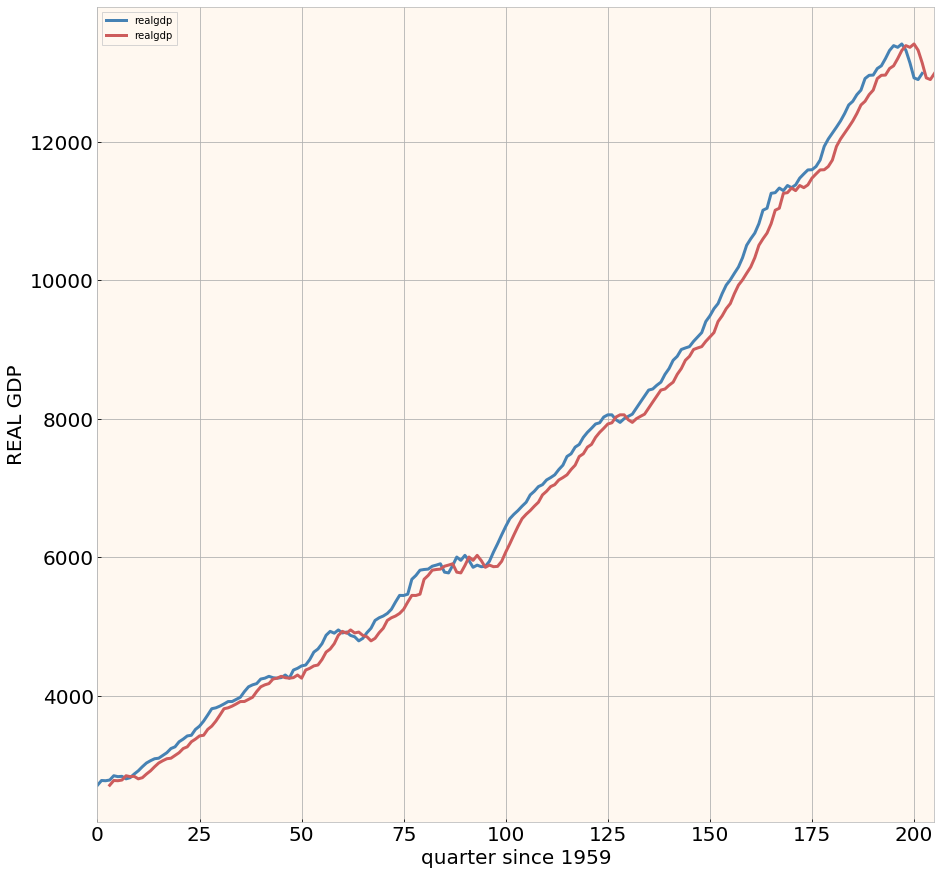

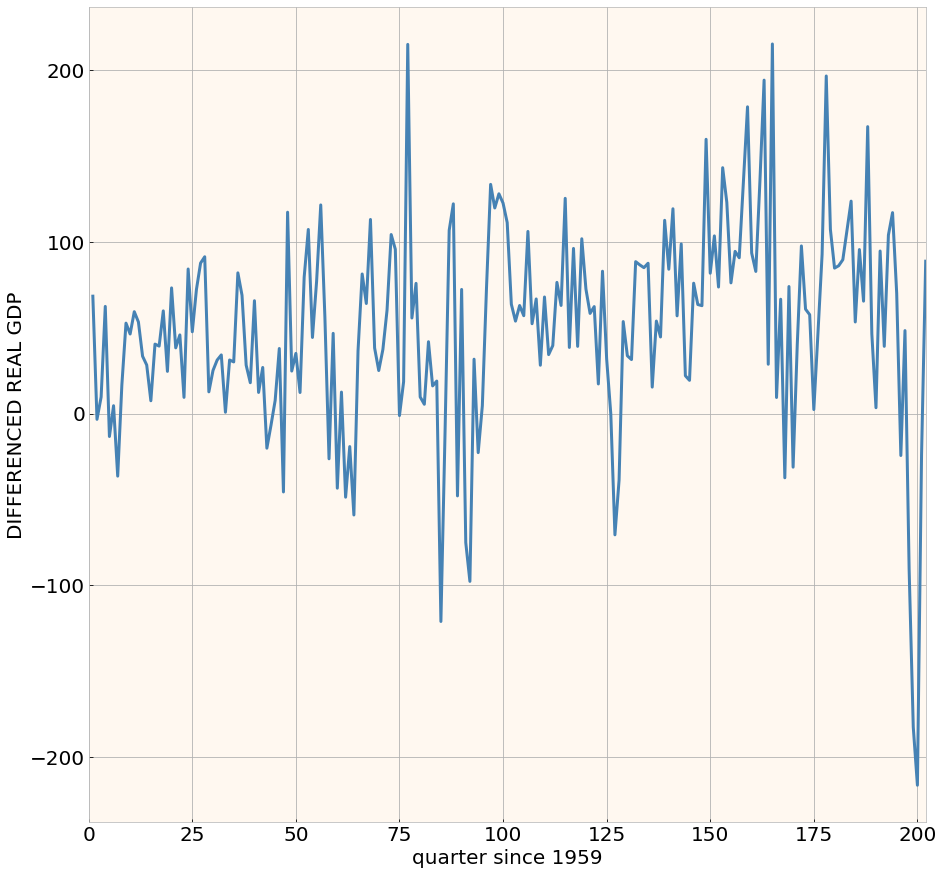

In [5]:

ax1 = data[['realgdp']].plot(figsize=(15,15), fontsize=20)
ax1 = data[['realgdp']].plot(x=np.arange(len(data)) + 3, ax=ax1)
ax1.set_xlabel('quarter since 1959', fontsize=20)
ax1.set_ylabel('REAL GDP', fontsize=20)
 
pl.figure()
ax2 = data.realgdp.diff(periods=1).plot(figsize=(15,15), fontsize=20)
ax2.set_xlabel('quarter since 1959', fontsize=20)
ax2.set_ylabel('DIFFERENCED REAL GDP', fontsize=20)


# NON stationary time series, stationary in mean

Text(0.5,1,'non-stationary variance')

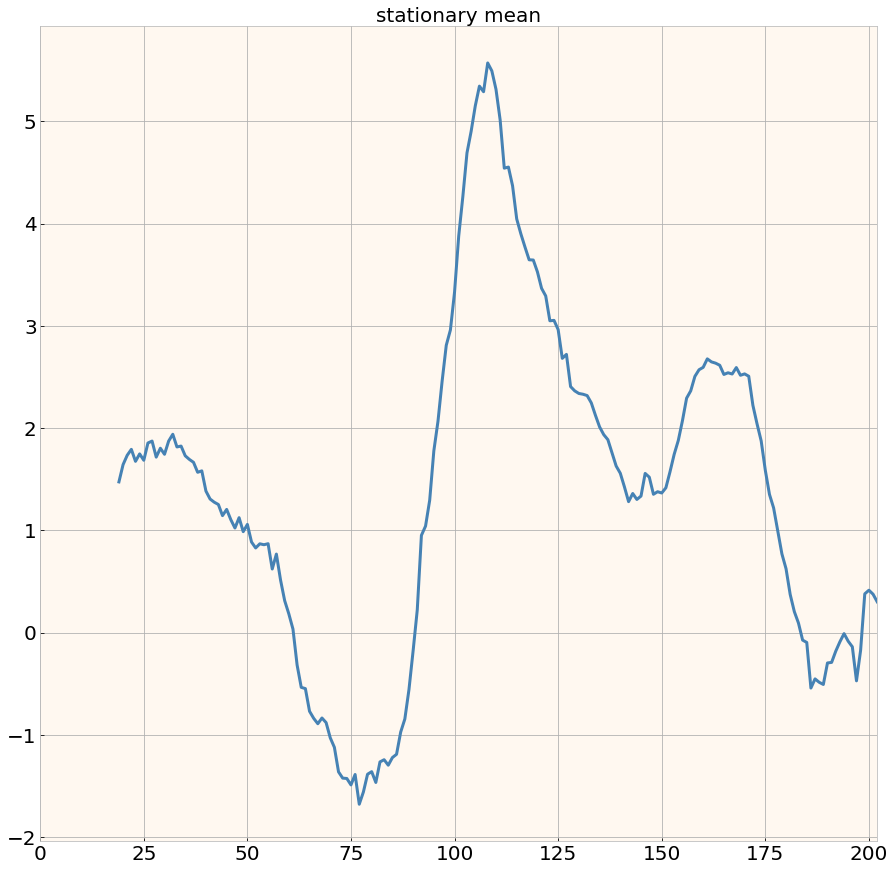

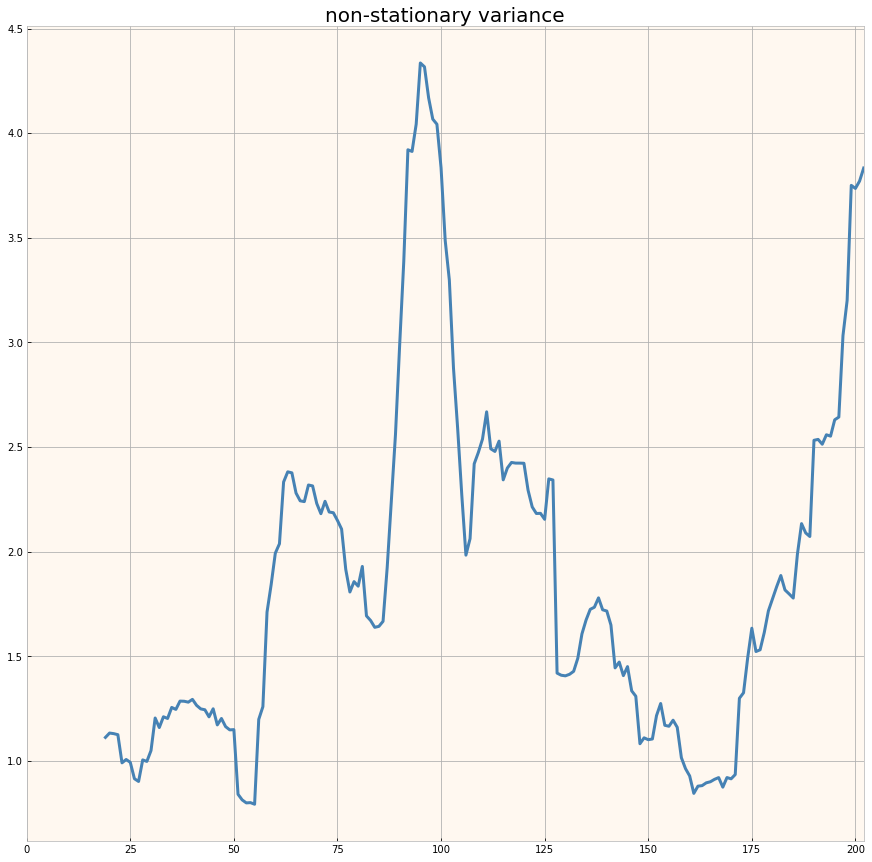

In [6]:
ax = pd.rolling_mean(data['realint'], 20).plot(figsize=(15,15), fontsize=20)
ax.set_title("stationary mean", fontsize=20)
pl.figure()
ax = pd.rolling_std(data['realint'], 20).plot(figsize=(15,15))
ax.set_title("non-stationary variance", fontsize=20)

# synthetic data

Text(0.5,1,'non-stationary variane')

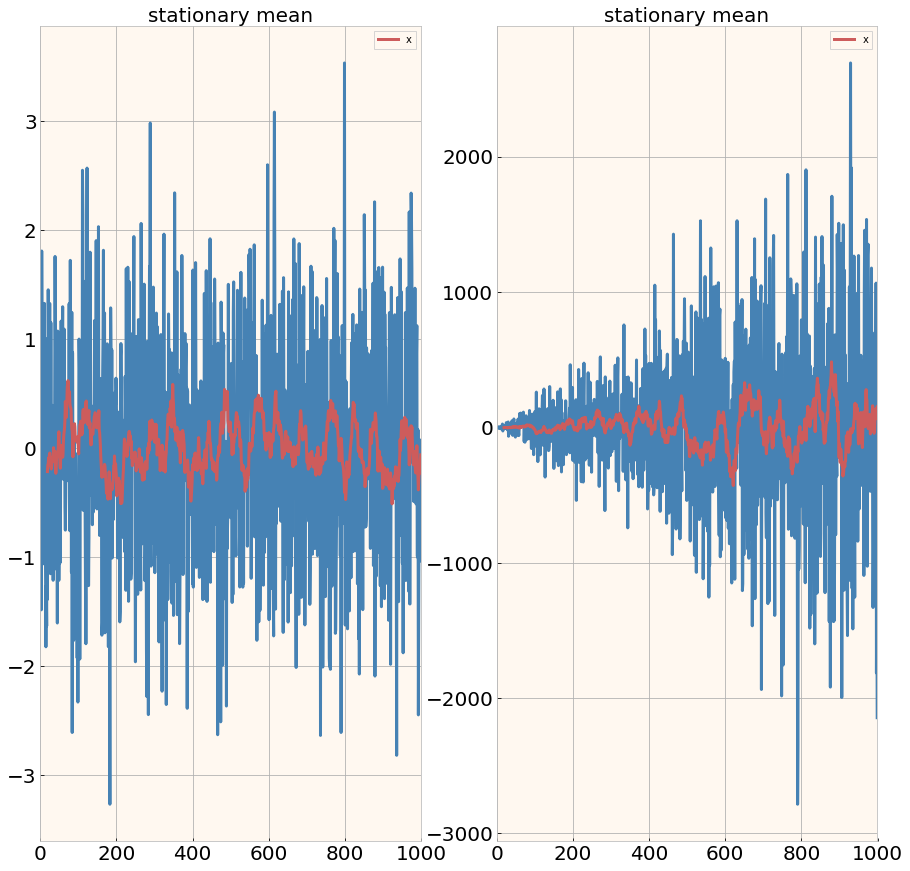

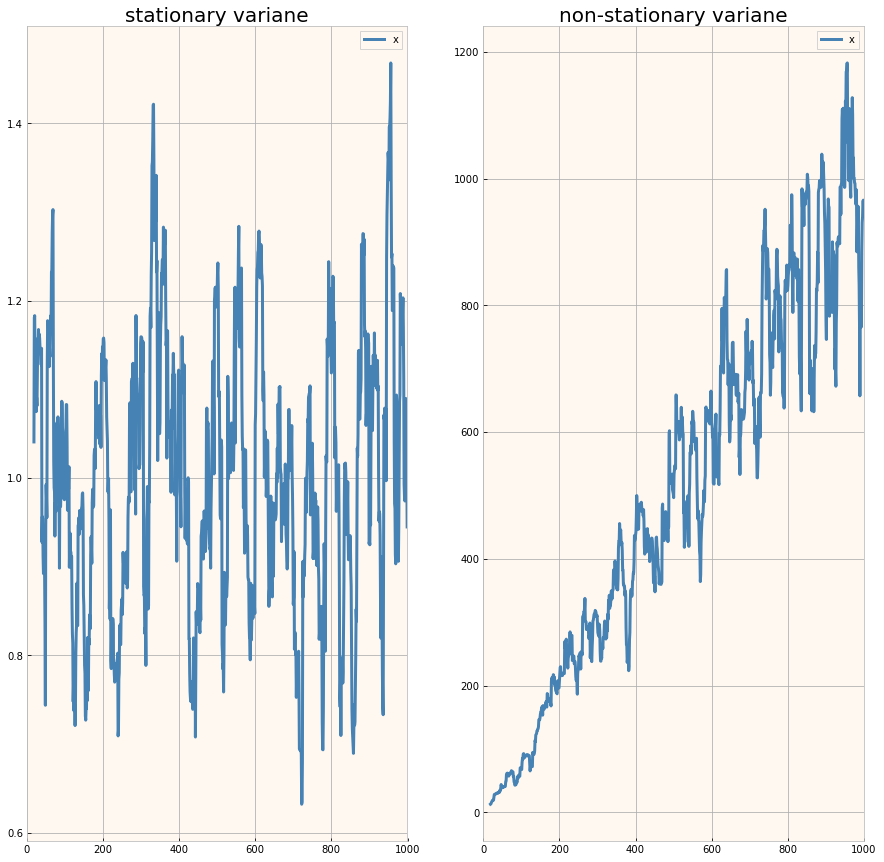

In [7]:
fig = pl.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
np.seed=310
x1 = np.random.randn(1000)
x2 = np.random.randn(1000) * np.arange(0., 100, 1.0)
ax1.plot(np.random.randn(1000))
ax2.plot(np.random.randn(1000) * np.arange(1000))
ax1 = pd.rolling_mean(pd.DataFrame({'x': x1}), 20).plot(figsize=(15,15), 
                                                       fontsize=20, ax=ax1)
ax2 = pd.rolling_mean(pd.DataFrame({'x': x2}), 20).plot(figsize=(15,15), 
                                                       fontsize=20, ax=ax2)

ax1.set_title("stationary mean", fontsize=20)
ax2.set_title("stationary mean", fontsize=20)



fig = pl.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1 = pd.rolling_std(pd.DataFrame({'x':x1}), 20).plot(figsize=(15,15), ax=ax1)
ax2 = pd.rolling_std(pd.DataFrame({'x':x2}), 20).plot(figsize=(15,15), ax=ax2)
ax1.set_title("stationary variane", fontsize=20)
ax2.set_title("non-stationary variane", fontsize=20)

# Formal tests to see if these time series are stationary e.g.: ADFuller test
[https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test]
Null hypothsis: there is a "unit root": i.e. the series is not stationary [http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html]


In [8]:
#sm.tsa.adfuller?
'''The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, 
with the alternative that there is no unit root. If the pvalue is above a critical size, 
then we cannot reject that there is a unit root. 
No unit root generally means stationarity'''



'The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, \nwith the alternative that there is no unit root. If the pvalue is above a critical size, \nthen we cannot reject that there is a unit root. \nNo unit root generally means stationarity'

In [9]:
print ("REALGDB and REALINT stationatiry, AD Fuller test\n\n")
print ("realgdp {0:.2f}".format(sm.tsa.adfuller(data['realgdp'])[1]), 
       sm.tsa.adfuller(data['realgdp']))

print ("realint {0:.2f}".format(sm.tsa.adfuller(data['realint'])[1]), 
       sm.tsa.adfuller(data['realint']))



REALGDB and REALINT stationatiry, AD Fuller test


realgdp 1.00 (1.7504627967647124, 0.99824553723350318, 12, 190, {'5%': -2.8768752281673717, '10%': -2.5749446537396121, '1%': -3.4652439354133255}, 2034.5171236683821)
realint 0.01 (-3.5337325911860322, 0.0071618724946517871, 2, 200, {'5%': -2.876102355, '10%': -2.574532225, '1%': -3.4634760791249999}, 827.24666293305995)


In [10]:
print ("SYNTHETIC STATIONARY DATA\n\n")
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(np.random.randn(1000))[1]),
       sm.tsa.adfuller(np.random.randn(100)) )
print ("synthetic stationary data {0:.2f}".format(sm.tsa.adfuller(np.random.randn(1000))[1]),
       sm.tsa.adfuller(np.random.randn(1000)*np.arange(0.,1000,1.0)) )

SYNTHETIC STATIONARY DATA


synthetic stationary data 0.00 (-11.644901830669825, 2.1036418442956151e-21, 0, 99, {'5%': -2.8912082118604681, '10%': -2.5825959973472097, '1%': -3.4981980821890981}, 258.54083436510257)
synthetic stationary data 0.00 (-29.39778535794224, 0.0, 0, 999, {'5%': -2.864437475834273, '10%': -2.568312754566378, '1%': -3.4369127451400474}, 15169.895601367289)


In [11]:
print (sm.datasets.cancer.NOTE)

::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [12]:
cdata = sm.datasets.cancer.load_pandas().data

In [13]:
cdata.describe()

,cancer,population
count,301.000000,301.000000
mean,39.857143,11288.056478
std,50.977801,13780.010088
min,0.000000,445.000000
25%,11.000000,2935.000000
50%,22.000000,6445.000000
75%,48.000000,13989.000000
max,360.000000,88456.000000


In [14]:
cdata.head()

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11964e6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a6e19e8>]], dtype=object)

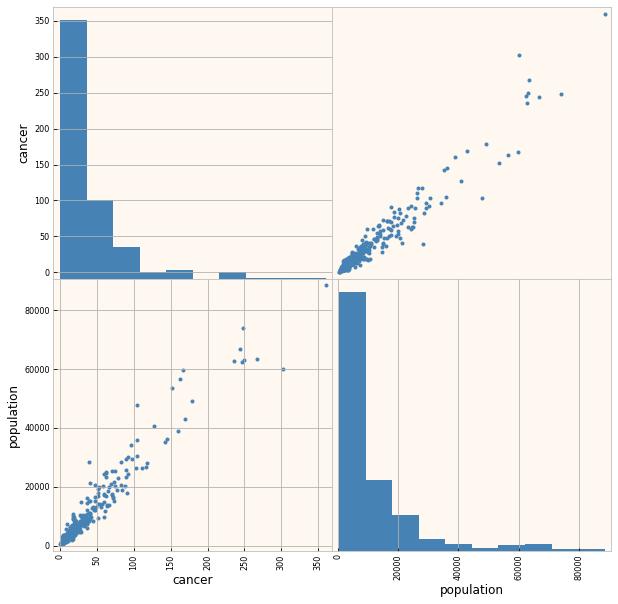

In [15]:
pd.scatter_matrix(cdata, figsize(10,10))

Text(0,0.5,'cancer index')

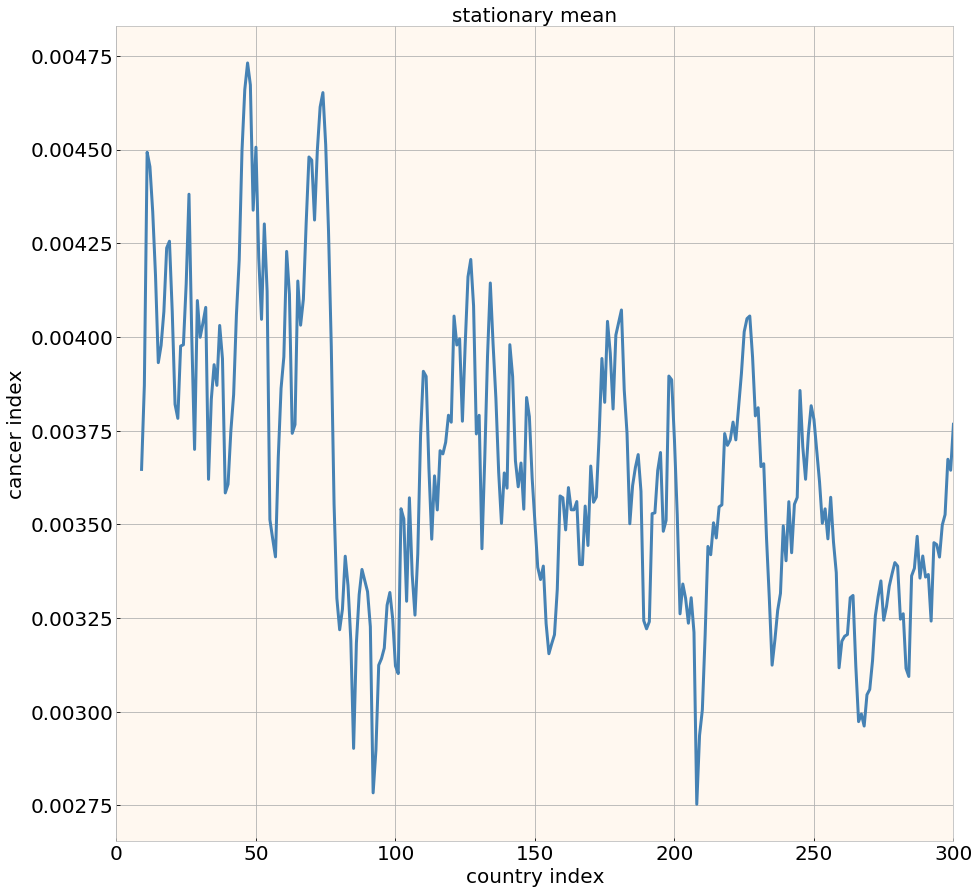

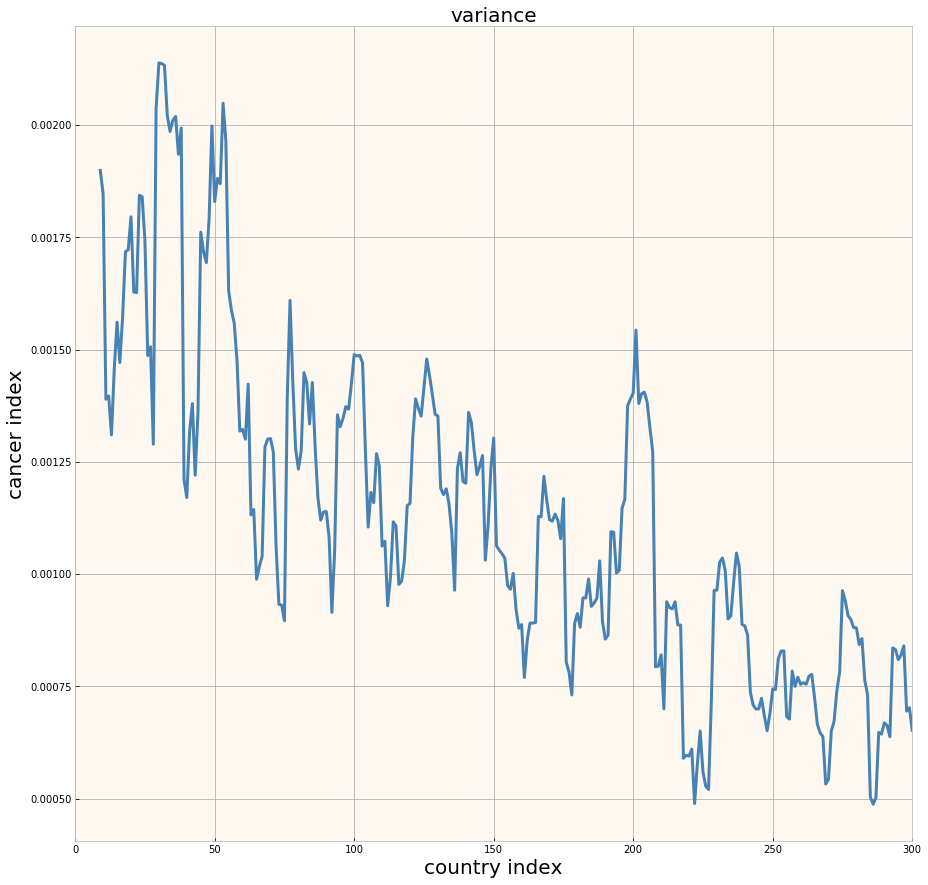

In [16]:
ax = pd.rolling_mean(cdata['cancer'] / cdata['population'], 10).plot(figsize=(15,15), 
                                                                   fontsize=20)
ax.set_title("stationary mean", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)
pl.figure()
ax = pd.rolling_std(cdata['cancer'] / cdata['population'], 10).plot(figsize=(15,15))
ax.set_title("variance", fontsize=20)
ax.set_xlabel("country index", fontsize=20)
ax.set_ylabel("cancer index", fontsize=20)

In [17]:
print ("AD Fuller test on cancer rate by country")
sm.tsa.adfuller (cdata['cancer'] / cdata['population'])

AD Fuller test on cancer rate by country


(-3.2124663237520563,
 0.019274324926640333,
 16,
 284,
 {'1%': -3.4535872903895797,
  '10%': -2.5722217283277127,
  '5%': -2.8717713552112119},
 -3030.2409529605561)

In [22]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

samples = [np.random.randn(100)*np.cos(np.arange(100))/3.14*np.random.rand() for i in range(4)]
#fig = pl.figure(figsize = (10,20));
ax=[]
fig = pl.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
np.seed=310
x1 = np.random.randn(1000)
x2 = np.random.randn(1000) * np.arange(0., 1000, 1.0)
ax1.plot(np.random.randn(1000))
ax2.plot(np.random.randn(1000) * np.arange(1000))
ax1 = pd.rolling_mean(pd.DataFrame({'x': x1}), 20).plot(figsize=(15,15), 
                                                       fontsize=20, ax=ax1)
ax2 = pd.rolling_mean(pd.DataFrame({'x': x2}), 20).plot(figsize=(15,15), 
                                                       fontsize=20, ax=ax2)

ax1.set_title("stationary mean", fontsize=20)
ax2.set_title("stationary mean", fontsize=20)


import plotly.plotly as py
apikey = open("plotlyapi.txt", "r").readlines()[0]
py.sign_in('fedhere@gmail.com', apikey)
from plotly.matplotlylib import Exporter, PlotlyRenderer

renderer = PlotlyRenderer()    # make shorcuts 
exporter = Exporter(renderer)
# Grab info from matplotlib figure
exporter.run(fig)
# Create JSON dictionary for use with Plotly
renderer.plotly_fig
py.iplot(renderer.plotly_fig, filename='s6_nitty-gritty')



//anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

//anaconda/lib/python3.5/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.

